In [ ]:
#importing packages
import time
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from functools import reduce
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from datetime import datetime

In [ ]:
#mounting to google drive for live in-game odd changes
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"

Mounted at /content/drive/


Saving the initial lines (do this before games start)

In [ ]:
#imports
#RUN ONLY 1 TIME: collects 'initial odds': therefore all differences will be 0 at time 0, as time goes on since running (and games start), the odds change

#function specific to json ex: https://sportsbook.fanduel.com/cache/psmg/US/53474.3.json
def parse_data(jsooooon):
    results = pd.DataFrame()
    for ayo in jsooooon['events']:
        money = json_normalize(ayo).drop('markets',axis=1)
        for bandos in ayo['markets']:
            gambling = json_normalize(bandos).drop('selections',axis=1)
            gambling.columns = [str(col) + '.markets' for col in gambling.columns]
            for theta in bandos['selections']:
                yeye = json_normalize(theta)
                yeye.columns = [str(col) + '.selections' for col in yeye.columns]
                yoyo = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), [money, gambling, yeye])
                results = results.append(yoyo, sort=True).reset_index(drop=True)
    return results

#getting jsons, nfl doesnt work
nfl = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/57494.3.json').json()
nba = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/55978.3.json').json()
bball = requests.get('https://sportsbook.fanduel.com/cache/psmg/US/53474.3.json').json()


#setting up df
cbb = parse_data(bball)
cb = pd.DataFrame()
cbb_ = cbb[cbb['name.markets']=='Spread Betting']
cb[['lines','team','away_t','home_t','start_time']] = cbb_[['currenthandicap.selections','name.selections','participantname_away','participantname_home','tsstart']]

away = cb[cb['team']==cb['away_t']]
away['lines'] = away['lines'].astype(int)*-1
home = cb[cb['team']==cb['home_t']]

#RUN THIS CELL, THEN PREP WORK DONE (DONT RUN AGAIN!) --> ALL OF YOUR DIFFERENCES WILL BE 0 at first!!
home_initial = pd.DataFrame()
away_initial = pd.DataFrame()
away_initial[['initial_lines','team']] = away[['lines','team']]
home_initial[['initial_lines','team']] = home[['lines','team']]

both = pd.DataFrame()
both['away_team'] = list(away_initial['team'])
both['home_team'] = list(home_initial['team'])
both['away_line'] = list(away_initial['initial_lines'])
both['home_line'] = list(home_initial['initial_lines'])

both.to_csv(f'{PATH}CBB_1_31.csv',index = False)

both.head()

In [ ]:
#Getting email + credential deets
#to get it to work for your g

#mail account (https://support.google.com/accounts/answer/6010255#zippy=%2Cif-less-secure-app-access-is-on-for-your-account), click on 'less secure app access', click allow
SENDER_EMAIL = 'williamc@ggny.com'
SENDER_PASS = 'William112399@'
REC_EMAIL = 'wac6er@virginia.edu'

#in minutes, time you want to monitor
time_mins = 1000

Saving a table that tracks in game line differences for NCAAB + emailing an alert if games lines change by xx

In [ ]:
for i in range(1000):
  all_games_today_away = pd.read_csv((f'{PATH}away_games.csv'))
  
  ff = all_games_today_away.iloc[:,-6:-4]
  ff['time'] = all_games_today_away['time_from_start']
  ff['difference'] = all_games_today_away['difference']
  ff['team'] = all_games_today_away['team']

  check = ff[ff['difference']<-10]

  if len(check) > 1:
    mail_content_away = check.to_string()


    #credentials
    sender_address = SENDER_EMAIL
    sender_pass = SENDER_PASS
    receiver_address = REC_EMAIL
    #Setup the MIME
    message = MIMEMultipart()
    message['From'] = sender_address
    message['To'] = receiver_address

    #subject + i to make it new email (will be changed to range of loop)
    message['Subject'] = '!!hammer time!!' + str(i)

    #random
    message.attach(MIMEText(mail_content_away, 'plain'))
    session = smtplib.SMTP('smtp.gmail.com', 587) 
    session.starttls()
    session.login(sender_address, sender_pass) 
    text = message.as_string()
    session.sendmail(sender_address, receiver_address, text)
    session.quit()

    all_games_today_home = pd.read_csv((f'{PATH}home_games.csv'))

    ff = all_games_today_home.iloc[:,-6:-4]
    ff['time'] = all_games_today_home['time_from_start']
    ff['difference'] = all_games_today_home['difference']
    ff['team'] = all_games_today_home['team']

    check = ff[ff['difference']<-10]

  if len(check) > 1:
    mail_content_home = check.to_string()


    #credentials
    sender_address = SENDER_EMAIL
    sender_pass = SENDER_PASS
    receiver_address = REC_EMAIL
    #Setup the MIME
    message = MIMEMultipart()
    message['From'] = sender_address
    message['To'] = receiver_address

    #subject + i to make it new email (will be changed to range of loop)
    message['Subject'] = '!!hammer time!!' + str(i)

    #random
    message.attach(MIMEText(mail_content_home, 'plain'))
    session = smtplib.SMTP('smtp.gmail.com', 587) 
    session.starttls()
    session.login(sender_address, sender_pass) 
    text = message.as_string()
    session.sendmail(sender_address, receiver_address, text)
    session.quit()

  time.sleep(random.uniform(30,60))

KeyboardInterrupt: ignored

In [ ]:
all_games_today_away = pd.read_csv((f'{PATH}away_games.csv'))
all_games_today_home = pd.read_csv((f'{PATH}home_games.csv'))

sendable_away = all_games_today_away.head(5)
sendable_home = all_games_today_home.head(5)


Saving a chart plotting live game line differences to google drive every xx seconds

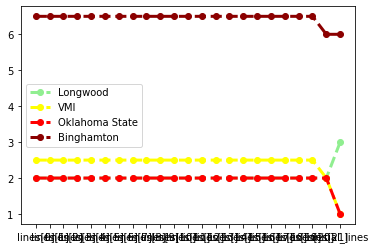

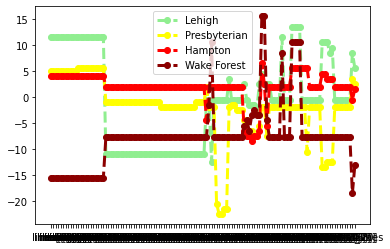

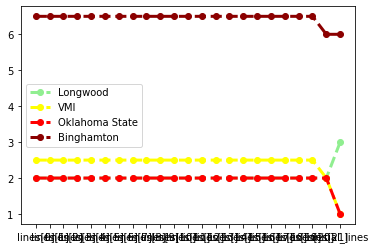

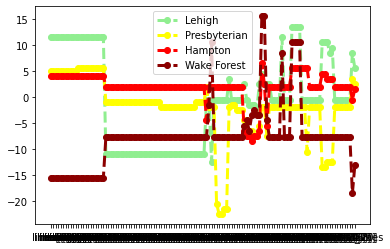

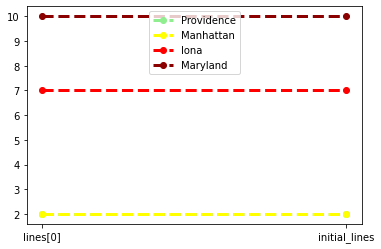

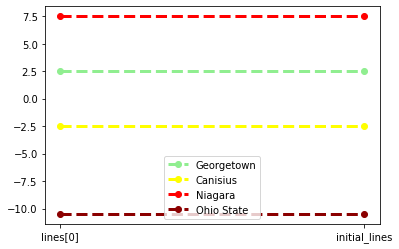

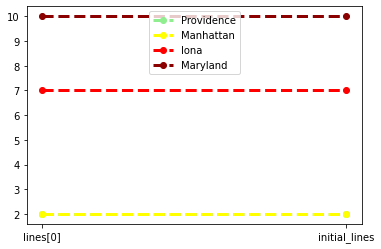

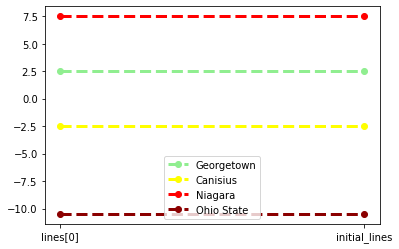

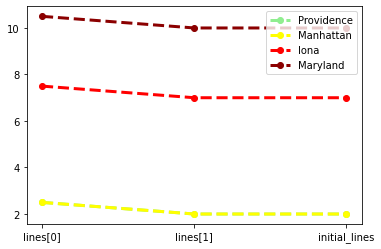

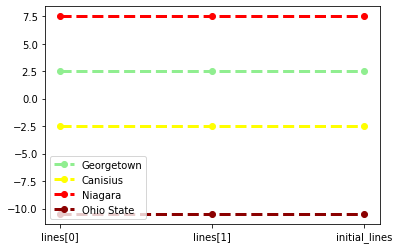

In [ ]:
for i in range(100):
    all_games_today_away = pd.read_csv((f'{PATH}away_games.csv'))
    all_games_today_home = pd.read_csv((f'{PATH}home_games.csv'))

    sendable_away = all_games_today_away.head(5)
    sendable_home = all_games_today_home.head(5)


 

    legend_a = list(sendable_away['team'])
    legend_h = list(sendable_home['team'])

    sendable_away = sendable_away.drop(columns = ['away_t','home_t','start_time','difference','current_time','datethen','time_from_start'])
    sendable_away = sendable_away.set_index(['team'])
    sendable_away = abs(sendable_away)
    sendable_away = sendable_away.apply(lambda row: row.fillna(row.mean()), axis=1)

    
    away_1 = list(sendable_away.iloc[0])
    away_2 = list(sendable_away.iloc[1])
    away_3 = list(sendable_away.iloc[2])
    away_4 = list(sendable_away.iloc[3])


    Xaxis_a = list(sendable_away)

    sendable_initial_h = sendable_home['initial_lines']

    sendable_home = sendable_home.drop(columns = ['away_t','home_t','start_time','difference','current_time','datethen','time_from_start'])
    sendable_home = sendable_home.set_index(['team'])
    sendable_home = sendable_home.apply(lambda row: row.fillna(row.mean()), axis=1)



    home_1 = list(sendable_home.iloc[0])
    home_2 = list(sendable_home.iloc[1])
    home_3 = list(sendable_home.iloc[2])
    home_4 = list(sendable_home.iloc[3])

    Xaxis_h = list(sendable_home)

    plt.plot( Xaxis_a, away_1, marker='o', markerfacecolor='lightgreen', markersize=6, color='lightgreen', linewidth=3,linestyle='dashed',label =legend_a[0])
    plt.plot( Xaxis_a, away_2, marker='o', markerfacecolor='yellow', markersize=6, color='yellow', linewidth=3,linestyle='dashed',label =legend_a[1])
    plt.plot( Xaxis_a, away_3, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=3,linestyle='dashed',label =legend_a[2])
    plt.plot( Xaxis_a, away_4, marker='o', markerfacecolor='darkred', markersize=6, color='darkred', linewidth=3,linestyle='dashed',label =legend_a[3])

    # show legend
    plt.legend()

    # show graph
    awayfig  = plt.gcf()
    plt.show()
    plt.draw()
    awayfig.savefig(f'{PATH}cbb_a_top3.png',dpi=100)


    plt.plot( Xaxis_h, home_1, marker='o', markerfacecolor='lightgreen', markersize=6, color='lightgreen', linewidth=3,linestyle='dashed',label =legend_h[0])
    plt.plot( Xaxis_h, home_2, marker='o', markerfacecolor='yellow', markersize=6, color='yellow', linewidth=3,linestyle='dashed',label =legend_h[1])
    plt.plot( Xaxis_h, home_3, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=3,linestyle='dashed',label =legend_h[2])
    plt.plot( Xaxis_h, home_4, marker='o', markerfacecolor='darkred', markersize=6, color='darkred', linewidth=3,linestyle='dashed',label =legend_h[3])


    # show legend
    plt.legend()

    # show graph
    homefig = plt.gcf()
    plt.show()
    plt.draw()
    homefig.savefig(f'{PATH}cbb_h_top3.png',dpi=100)

    time.sleep(60)


SCRAP YARD BELOW

In [ ]:
   #content of email (assembled above) - ADJUST: points given, start time (millitary)
    points_gained_since_12p = 1
    start = '14:50:00'

    points_gained_since_12p = points_gained_since_12p*-1
    
    sendable_away = sendable_away[sendable_away['difference']<=points_gained_since_12p]
    sendable_home = sendable_home[sendable_home['difference']<=points_gained_since_12p]

  
    sendable_away = sendable_away[sendable_away['start_time']>='2022-02-02T'+start]
    sendable_home = sendable_home[sendable_home['start_time']>='2022-02-02T'+start]


In [ ]:
#ENTER YOUR EMAIL
#to get it to work for your g

#mail account (https://support.google.com/accounts/answer/6010255#zippy=%2Cif-less-secure-app-access-is-on-for-your-account), click on 'less secure app access', click allow
SENDER_EMAIL = 'flow2go11@gmail.com'
SENDER_PASS = 'William112399@'
REC_EMAIL = 'wac6er@virginia.edu'

#in minutes, time you want to monitor
time_mins = 5

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"


Mounted at /content/drive/


In [ ]:
#enter this to run it
current_time = list()
cb = pd.DataFrame()

for i in range(time_mins):
    i = [i]
    nfl = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/57494.3.json').json()
    nba = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/55978.3.json').json()
    bball = requests.get('https://sportsbook.fanduel.com/cache/psmg/US/53474.3.json').json()


    #setting up df
    cbb = parse_data(bball)
    cbb_ = cbb[cbb['name.markets']=='Spread Betting']
    cb[['lines'+str(i),'team','away_t','home_t','start_time']] = cbb_[['currenthandicap.selections','name.selections','participantname_away','participantname_home','tsstart']]

    away = cb[cb['team']==cb['away_t']]
    away['lines'+str(i)] = away['lines'+str(i)].astype(int)*-1
    home = cb[cb['team']==cb['home_t']]

    away = pd.merge(away,away_initial,on='team')
    home = pd.merge(home,home_initial,on='team')
    home['difference'] = home['initial_lines'].astype(int) - home['lines'+str(i)].astype(int)
    away['difference'] = away['initial_lines'].astype(int) - away['lines'+str(i)].astype(int)
    pieces = (away,home)
    all_games_today = pd.concat(pieces, ignore_index = True)
    all_games_today = all_games_today[all_games_today['start_time']>='2022-01-25T15:20:00']
    
    now = datetime.now()
    all_games_today['current_time'] = now
    all_games_today['datethen'] = pd.to_datetime(all_games_today['current_time'],infer_datetime_format = True)
    all_games_today['start_time'] = pd.to_datetime(all_games_today['start_time'],infer_datetime_format = True)
    all_games_today['time_from_start'] = all_games_today['datethen']-all_games_today['start_time']

    sendable = all_games_today.head(20)

    #content of email (assembled above) - ADJUST: points given, start time (millitary)
    points_gained_since_12p = 13
    start = '19:50:00'

    points_gained_since_12p = points_gained_since_12p*-1
    
    all_games_today_away = all_games_today[all_games_today['team']==all_games_today['away_t']]
    all_games_today_home = all_games_today[all_games_today['team']==all_games_today['home_t']]

    all_games_today_away = all_games_today_away.sort_values('difference')
    all_games_today_home = all_games_today_home.sort_values('difference')

    

    all_games_today_home.to_csv(f'{PATH}home_games_20.csv',index = False)
    all_games_today_away.to_csv(f'{PATH}away_games_20.csv',index = False)


In [ ]:
#enter this to run it
current_time = list()
cb = pd.DataFrame()

for i in range(time_mins):
    i = [i]
    nfl = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/57494.3.json').json()
    nba = requests.get('https://sportsbook.fanduel.com/cache/psmg/UK/55978.3.json').json()
    bball = requests.get('https://sportsbook.fanduel.com/cache/psmg/US/53474.3.json').json()


    #setting up df
    cbb = parse_data(bball)
    cbb_ = cbb[cbb['name.markets']=='Spread Betting']
    cb[['lines'+str(i),'team','away_t','home_t','start_time']] = cbb_[['currenthandicap.selections','name.selections','participantname_away','participantname_home','tsstart']]

    away = cb[cb['team']==cb['away_t']]
    away['lines'+str(i)] = away['lines'+str(i)].astype(int)*-1
    home = cb[cb['team']==cb['home_t']]

    away = pd.merge(away,away_initial,on='team')
    home = pd.merge(home,home_initial,on='team')

    home['difference'] = home['initial_lines'].astype(int) - home['lines'+str(i)].astype(int)
    away['difference'] = away['initial_lines'].astype(int) - away['lines'+str(i)].astype(int)
    pieces = (away,home)
    all_games_today = pd.concat(pieces, ignore_index = True)
    all_games_today = all_games_today[all_games_today['start_time']>='2022-01-25T15:20:00']
    
    now = datetime.now()
    all_games_today['current_time'] = now
    all_games_today['datethen'] = pd.to_datetime(all_games_today['current_time'],infer_datetime_format = True)
    all_games_today['start_time'] = pd.to_datetime(all_games_today['start_time'],infer_datetime_format = True)
    all_games_today['time_from_start'] = all_games_today['datethen']-all_games_today['start_time']

    sendable = all_games_today.head(20)

    #content of email (assembled above) - ADJUST: points given, start time (millitary)
    points_gained_since_12p = 13
    start = '19:50:00'

    points_gained_since_12p = points_gained_since_12p*-1
    
    all_games_today_away = all_games_today[all_games_today['team']==all_games_today['away_t']]
    all_games_today_home = all_games_today[all_games_today['team']==all_games_today['home_t']]

    all_games_today_away = all_games_today_away.sort_values('difference')
    all_games_today_home = all_games_today_home.sort_values('difference')

    

    all_games_today_home.to_csv(f'{PATH}home_games.csv',index = False)
    all_games_today_away.to_csv(f'{PATH}away_games.csv',index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
sendable_home.head()

,lines[0],team,away_t,home_t,start_time,initial_lines,difference,current_time,datethen,time_from_start
5,-11.5,Wake Forest,Pittsburgh,Wake Forest,2022-02-02 19:00:00,-13.0,-2,2022-02-02 19:24:38.613922,2022-02-02 19:24:38.613922,0 days 00:24:38.613922
8,3.5,Hampton,USC Upstate,Hampton,2022-02-02 19:00:00,1.5,-2,2022-02-02 19:24:38.613922,2022-02-02 19:24:38.613922,0 days 00:24:38.613922
6,6.5,Lehigh,Navy,Lehigh,2022-02-02 19:00:00,5.5,-1,2022-02-02 19:24:38.613922,2022-02-02 19:24:38.613922,0 days 00:24:38.613922
7,3.5,Presbyterian,Campbell,Presbyterian,2022-02-02 19:00:00,2.5,-1,2022-02-02 19:24:38.613922,2022-02-02 19:24:38.613922,0 days 00:24:38.613922
9,-1.0,NC State,Syracuse,NC State,2022-02-02 21:00:00,-2.0,-1,2022-02-02 19:24:38.613922,2022-02-02 19:24:38.613922,-1 days +22:24:38.613922


In [ ]:


    if len(sendable)>1:
        mail_content_away = sendable_away[['team','difference','lines','initial_lines']].to_string()+'https://95blue.com/sports.html?livebettingEZ=ready?logged=1#'
        mail_content_home = sendable_home[['team','difference','lines','initial_lines']].to_string()+'https://95blue.com/sports.html?livebettingEZ=ready?logged=1#'


        #credentials
        sender_address = SENDER_EMAIL
        sender_pass = SENDER_PASS
        receiver_address = REC_EMAIL
        #Setup the MIME
        message = MIMEMultipart()
        message['From'] = sender_address
        message['To'] = receiver_address

        #subject + i to make it new email (will be changed to range of loop)
        message['Subject'] = '!!hammer time!!' + str(i)

        #random
        message.attach(MIMEText(mail_content, 'plain'))
        session = smtplib.SMTP('smtp.gmail.com', 587) 
        session.starttls()
        session.login(sender_address, sender_pass) 
        text = message.as_string()
        session.sendmail(sender_address, receiver_address, text)
        session.quit()
        
        




    

In [ ]:
legend_a = list(all_games_today_away['team'])
    legend_h = list(all_games_today_home['team'])


    all_games_today_away = all_games_today_away.drop(columns = ['away_t','home_t','start_time','difference','initial_lines','current_time','datethen','time_from_start'])
    all_games_today_away = all_games_today_away.set_index(['team'])
    all_games_today_away= all_games_today_away.iloc[:,:-1]

    all_games_today_away = all_games_today_away.astype(int)*-1

    
    Team1 = list(all_games_today_away.iloc[0])
    Team2 = list(all_games_today_away.iloc[1])
    Team3 = list(all_games_today_away.iloc[2])
    Team4 = list(all_games_today_away.iloc[3])
    Team5 = list(all_games_today_away.iloc[4])
    Team6 = list(all_games_today_away.iloc[5])
    Team7 = list(all_games_today_away.iloc[6])
    Team8 = list(all_games_today_away.iloc[7])
    Team9 = list(all_games_today_away.iloc[8])
    Team10 = list(all_games_today_away.iloc[9])

    Xaxis = list(all_games_today_away)
    plt.plot( Xaxis, Team1, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=3, linestyle='dashed',label = legend_a[0])
    plt.plot( Xaxis, Team2, marker='o', markerfacecolor='darkorange', markersize=6, color='darkorange', linewidth=3, linestyle='dashed',label =legend_a[1])
    plt.plot( Xaxis, Team3, marker='o', markerfacecolor='darkred', markersize=6, color='darkred', linewidth=3,linestyle='dashed',label =legend_a[2])
    plt.plot( Xaxis, Team4, marker='o', markerfacecolor='tomato', markersize=6, color='tomato', linewidth=3, linestyle='dashed',label =legend_a[3])
    plt.plot( Xaxis, Team5, marker='o', markerfacecolor='cadetblue', markersize=6, color='cadetblue', linewidth=3, linestyle='dashed',label =legend_a[5])
    plt.plot( Xaxis, Team6, marker='o', markerfacecolor='black', markersize=6, color='black', linewidth=3,linestyle='dashed',label =legend_a[6])
    plt.plot( Xaxis, Team7, marker='o', markerfacecolor='limegreen', markersize=6, color='limegreen', linewidth=3,linestyle='dashed',label =legend_a[7])
    plt.plot( Xaxis, Team8, marker='o', markerfacecolor='turquoise', markersize=6, color='turquoise', linewidth=3,linestyle='dashed',label =legend_a[8])
    plt.plot( Xaxis, Team9, marker='o', markerfacecolor='lightseagreen', markersize=6, color='lightseagreen', linewidth=3,linestyle='dashed',label =legend_a[9])

    # show legend
    plt.legend()

    # show graph
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(f'{PATH}cbb_a_top10.png',dpi=100)


    all_games_today_home = all_games_today_home.drop(columns = ['away_t','home_t','start_time','difference','initial_lines','current_time','datethen','time_from_start'])
    all_games_today_home = all_games_today_home.set_index(['team'])
    Xaxis = list(all_games_today_home)

    Team1 = list(all_games_today_home.iloc[0])
    Team2 = list(all_games_today_home.iloc[1])
    Team3 = list(all_games_today_home.iloc[2])
    Team4 = list(all_games_today_home.iloc[3])
    Team5 = list(all_games_today_home.iloc[4])
    Team6 = list(all_games_today_home.iloc[5])
    Team7 = list(all_games_today_home.iloc[6])
    Team8 = list(all_games_today_home.iloc[7])
    Team9 = list(all_games_today_home.iloc[8])
    Team10 = list(all_games_today_home.iloc[9])

    plt.plot( Xaxis, Team1, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=3, linestyle='dashed',label = legend_h[0])
    plt.plot( Xaxis, Team2, marker='o', markerfacecolor='darkorange', markersize=6, color='darkorange', linewidth=3, linestyle='dashed',label =legend_h[1])
    plt.plot( Xaxis, Team3, marker='o', markerfacecolor='darkred', markersize=6, color='darkred', linewidth=3,linestyle='dashed',label =legend_h[2])
    plt.plot( Xaxis, Team4, marker='o', markerfacecolor='tomato', markersize=6, color='tomato', linewidth=3, linestyle='dashed',label =legend_h[3])
    plt.plot( Xaxis, Team5, marker='o', markerfacecolor='cadetblue', markersize=6, color='cadetblue', linewidth=3, linestyle='dashed',label =legend_h[5])
    plt.plot( Xaxis, Team6, marker='o', markerfacecolor='black', markersize=6, color='black', linewidth=3,linestyle='dashed',label =legend_h[6])
    plt.plot( Xaxis, Team7, marker='o', markerfacecolor='limegreen', markersize=6, color='limegreen', linewidth=3,linestyle='dashed',label =legend_h[7])
    plt.plot( Xaxis, Team8, marker='o', markerfacecolor='turquoise', markersize=6, color='turquoise', linewidth=3,linestyle='dashed',label =legend_h[8])
    plt.plot( Xaxis, Team9, marker='o', markerfacecolor='lightseagreen', markersize=6, color='lightseagreen', linewidth=3,linestyle='dashed',label =legend_h[9])
    plt.plot( Xaxis, Team10, marker='o', markerfacecolor='darkcyan', markersize=6, color='darkcyan', linewidth=3,linestyle='dashed',label =legend_h[10])

    # show legend
    plt.legend()

    # show graph
    fig2 = plt.gcf()
    plt.show()
    plt.draw()
    fig2.savefig(f'{PATH}cbb_h_top10.png',dpi=100)


    time.sleep(300)

IndentationError: ignored

In [ ]:
print(list(all_games_today))

['lines[0]', 'lines[1]', 'lines[2]', 'lines[3]', 'lines[4]', 'lines[5]', 'lines[6]', 'lines[7]', 'lines[8]', 'lines[9]']


In [ ]:

Team1 = list(all_games_today.iloc[0])
Team2 = list(all_games_today.iloc[1])
Team3 = list(all_games_today.iloc[2])
Team4 = list(all_games_today.iloc[3])
Team5 = list(all_games_today.iloc[4])
Team6 = list(all_games_today.iloc[5])
Xaxis = list(all_games_today)
print(Xaxis)
print(Team1)



['lines[0]', 'lines[1]', 'lines[2]', 'lines[3]', 'lines[4]', 'lines[5]', 'lines[6]', 'lines[7]', 'lines[8]', 'lines[9]']
[6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.0]


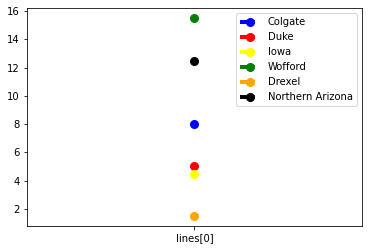

In [ ]:
import matplotlib.pyplot as plt

plt.plot( Xaxis, Team1, marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=3, linestyle='dashed',label = legend[0])
plt.plot( Xaxis, Team2, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=3, linestyle='dashed',label =legend[1])
plt.plot( Xaxis, Team3, marker='o', markerfacecolor='yellow', markersize=6, color='yellow', linewidth=3,linestyle='dashed',label =legend[2])
plt.plot( Xaxis, Team4, marker='o', markerfacecolor='green', markersize=6, color='green', linewidth=3, linestyle='dashed',label =legend[3])
plt.plot( Xaxis, Team5, marker='o', markerfacecolor='orange', markersize=6, color='orange', linewidth=3, linestyle='dashed',label =legend[5])
plt.plot( Xaxis, Team6, marker='o', markerfacecolor='black', markersize=6, color='black', linewidth=3,linestyle='dashed',label =legend[6])

# show legend
plt.legend()

# show graph
plt.show()